In [1]:
from statsmodels.tsa.forecasting.theta import ThetaModel
from statsforecast.models import Theta
from statsforecast import StatsForecast
import pandas as pd
import numpy as np
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *
from crptmidfreq.utils.common import to_csv
from crptmidfreq.utils.univ import hardcoded_universe_1
plt.style.use('ggplot')


g_folder = 'res_exploration_v2'
g_reg = StepperRegistry()
clean_folder(g_folder)

cfg={}
defargs = {'folder':g_folder,'name':None,'r':g_reg,'cfg':cfg}
defargs2 = {'folder':g_folder,'name':None,'r':g_reg}

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),
2025-04-17 09:14:06 - Cleaning folder res_exploration_v2


https://github.com/bashtage/AFE2020/blob/main/notebooks/The%20Theta%20Method.ipynb

My opinion on what is the theta model ? simply an OLS on the timeserie to get the trend. Then we mix this with the original timeserie


In [5]:

featd=prepare_klines(start_date='2024-09-01',
                   end_date='2026-01-01',
                   tokens=['BTCUSDT'],
                   **defargs)
featd,f1=perform_ewm(featd,feats=['close'],windows=[200],**defargs2)
# when theta=2 or 1 there is not much interest really
featd,f2=perform_theta(featd,feats=['close'],windows=[5000],thetas=[0.5],**defargs2)
df=pd.DataFrame({k:featd[k] for k in featd.keys()})
df['dts']=pd.to_datetime(df['dtsi']*1e3)
df=df.set_index('dts')

2025-04-17 09:16:27 - prepare_klines start_date=2024-09-01 end_date=2026-01-01
2025-04-17 09:16:27 - Reading data from DuckDB
2025-04-17 09:16:30 - Stepper creating instance res_exploration_v2 None_cnt_exists
2025-04-17 09:16:31 - Stepper creating instance res_exploration_v2 None_close_diff1
2025-04-17 09:16:31 - Stepper creating instance res_exploration_v2 None_tret_clip
2025-04-17 09:16:31 - Stepper creating instance res_exploration_v2 None_turnover_ewm43200
2025-04-17 09:16:32 - Stepper creating instance res_exploration_v2 None_turnover_ewm43200_qtl
2025-04-17 09:16:32 - Stepper creating instance res_exploration_v2 None_close_ewm200
2025-04-17 09:16:32 - Stepper creating instance res_exploration_v2 None_close_theta5000x0.5


<Axes: xlabel='dts'>

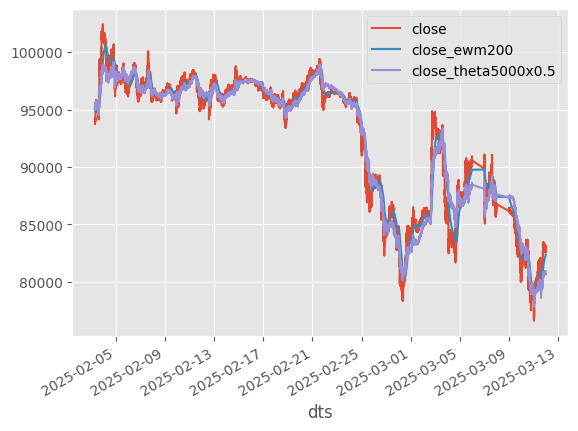

In [6]:
df[['close']+f1+f2].iloc[1000:].tail(50_000).plot()